# Dependencies

In [1]:
import sys
from datetime import datetime, timedelta
import copy
from operator import itemgetter
import os
from multiprocessing import Pool, cpu_count
from pathlib import Path
import itertools
import glob
import time

from scipy.stats import pearsonr
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.Evaluation import ClassificationEvaluation
from Chapter7.Evaluation import RegressionEvaluation
from Chapter7.LearningAlgorithms import ClassificationAlgorithms
from Chapter7.LearningAlgorithms import RegressionAlgorithms
from Chapter3.OutlierDetection import DistributionBasedOutlierDetection
from util.VisualizeDataset import VisualizeDataset


#### Check for outliers 

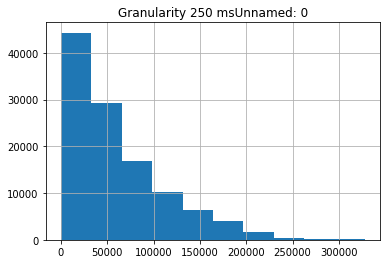

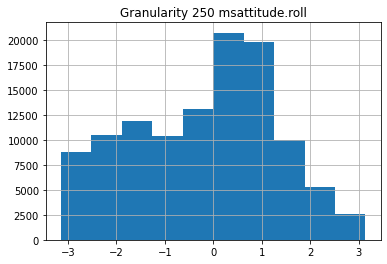

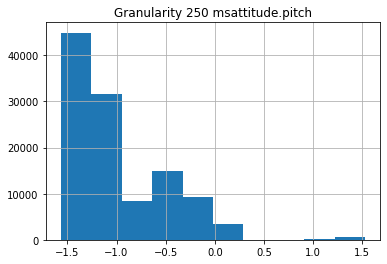

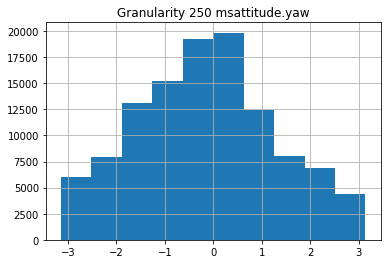

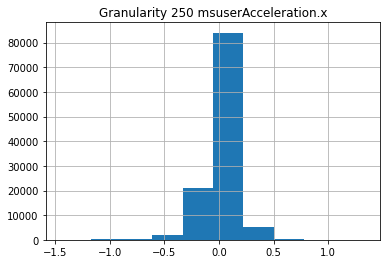

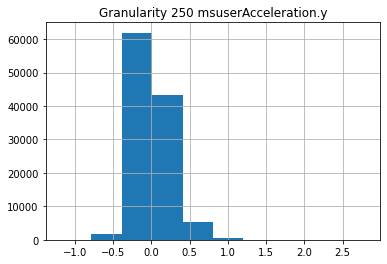

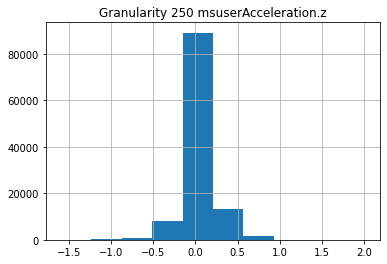

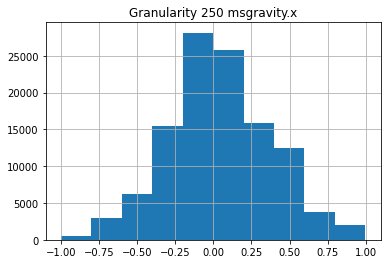

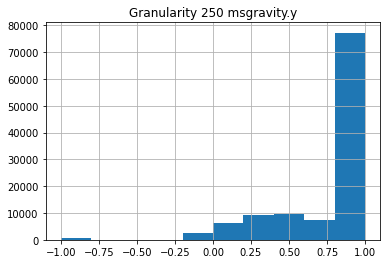

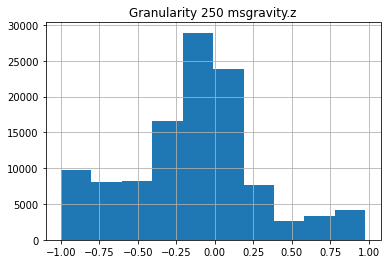

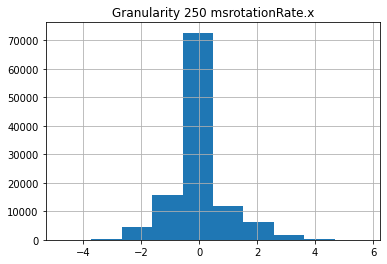

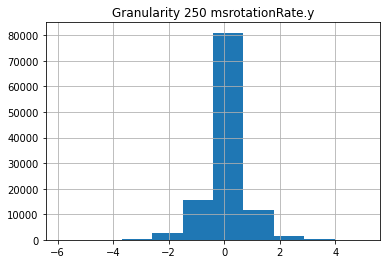

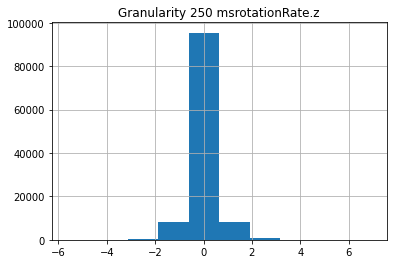

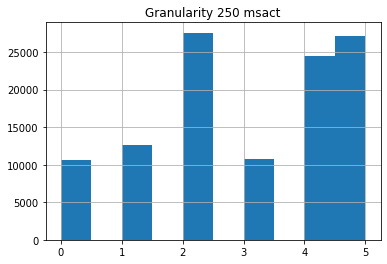

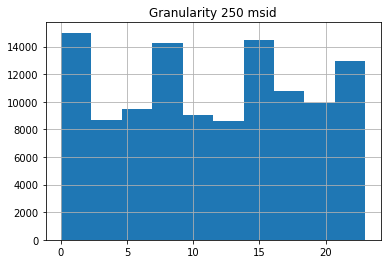

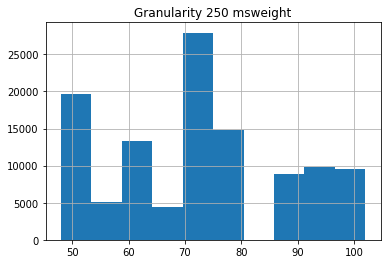

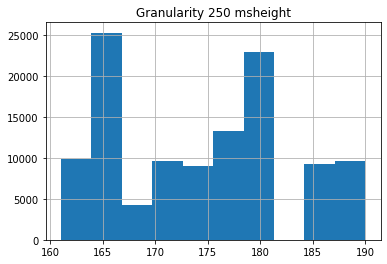

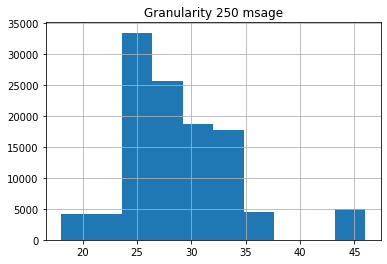

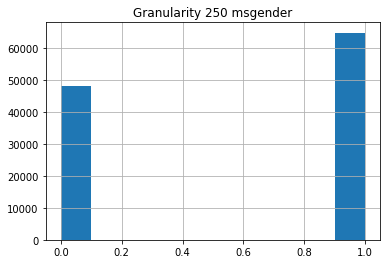

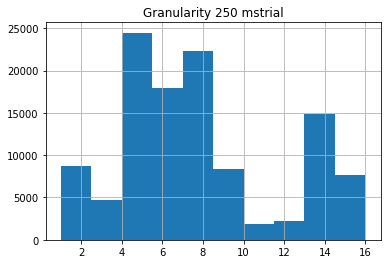

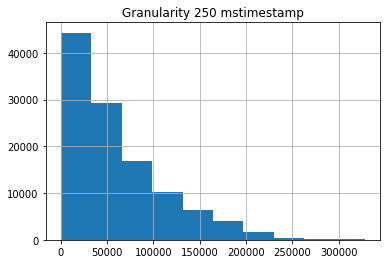

In [2]:
dataset = pd.read_csv('dataset_gran_250.csv')
predictor_columns = ['attitude.roll', 'attitude.pitch', 'attitude.yaw', 'userAcceleration.x',
       'userAcceleration.y', 'userAcceleration.z', 'gravity.x', 'gravity.y',
       'gravity.z', 'rotationRate.x', 'rotationRate.y', 'rotationRate.z',
       'attitude.pitch_outlier', 'attitude.yaw_outlier',
       'userAcceleration.x_outlier', 'userAcceleration.y_outlier',
       'userAcceleration.z_outlier', 'gravity.x_outlier', 'gravity.y_outlier']

#Visual inspection seems to show everything within a normal range
for col in dataset.columns:
    #if "attitude" in col:
    plt.figure()
    plt.title("Granularity 250 ms" + col)
    dataset[col].hist()
    plt.show()
        
        #plt.figure()
        #plt.title("Granularity 250 ms" + col)
        #df[col].hist()
        #plt.show()

# Outlier detection
### this is not up to date anymore

In [3]:

dist_detection = DistributionBasedOutlierDetection()
trials = [dataset[dataset['trial']==i] for i in dataset.trial.unique()]
for tt in trials:
    print(tt.size)

84609
0
99498
38010
97965
119595
47313
266805
202503
109872
175497
50463
377916
137298
394443
175119


In [4]:
print(dataset.columns)

try:
    dataset = pd.read_csv('outliers_detected_set.csv')
    
except FileNotFoundError:
    print('File not found.. Generating outliers')
    for col in predictor_columns:
        print(f'Outiers for col {col}')
        dist_detection.chauvenet(dataset, col)
    print('All done, saving for future usage')
    dataset.to_csv('outliers_detected_set.csv')


Index(['Unnamed: 0', 'attitude.roll', 'attitude.pitch', 'attitude.yaw',
       'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z',
       'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x',
       'rotationRate.y', 'rotationRate.z', 'act', 'id', 'weight', 'height',
       'age', 'gender', 'trial', 'timestamp'],
      dtype='object')


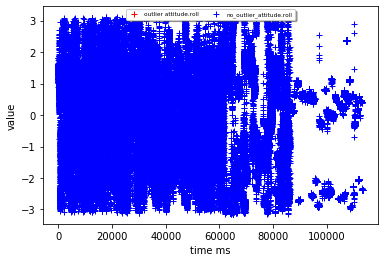

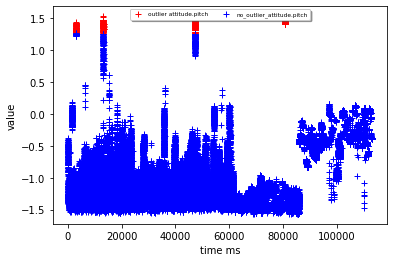

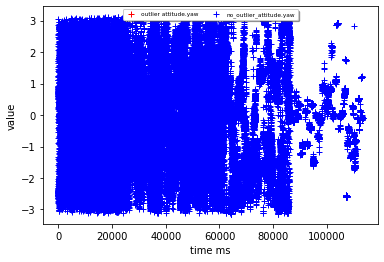

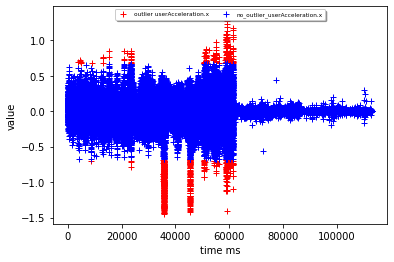

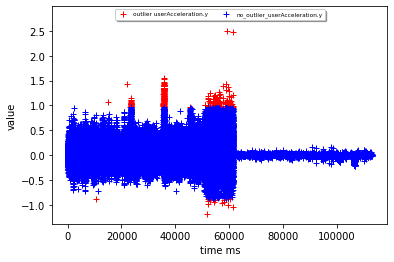

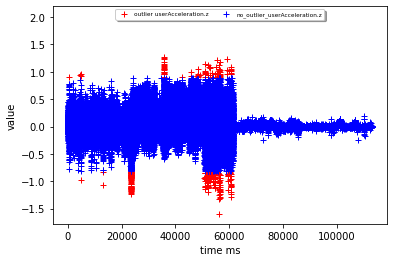

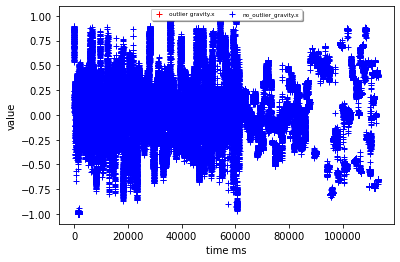

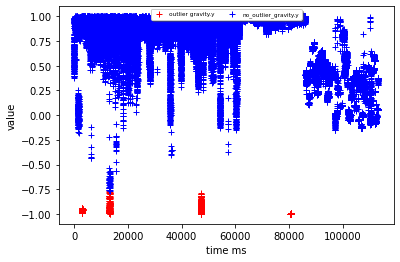

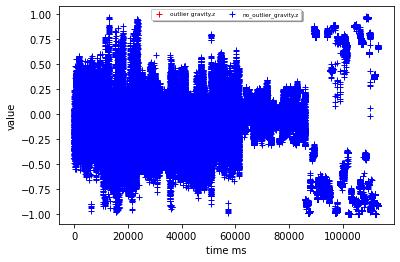

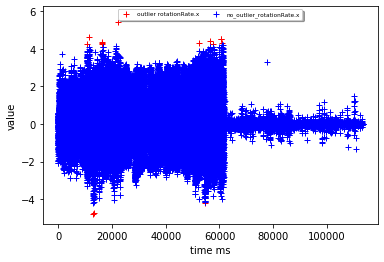

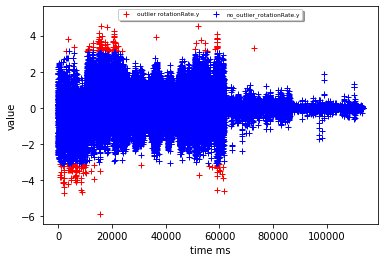

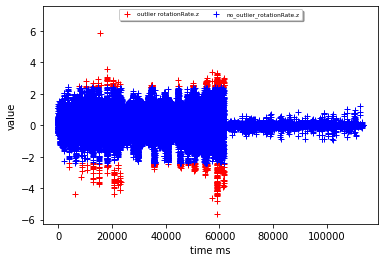

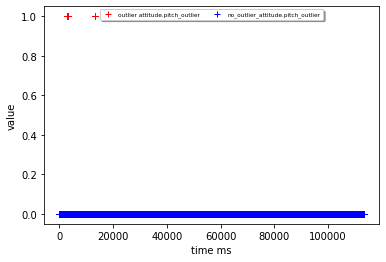

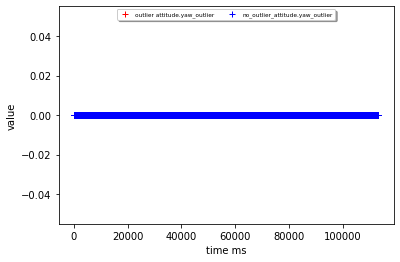

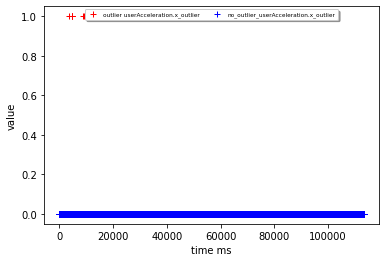

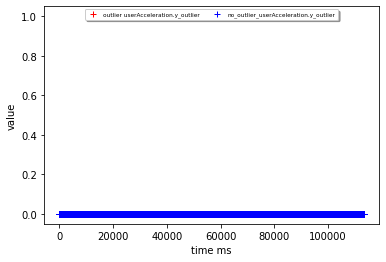

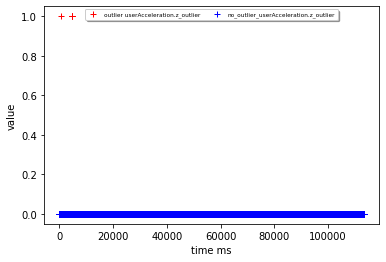

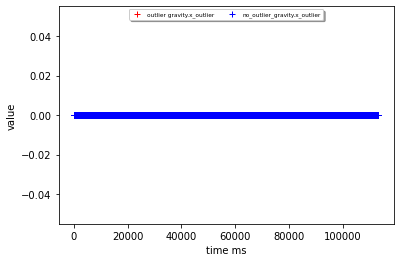

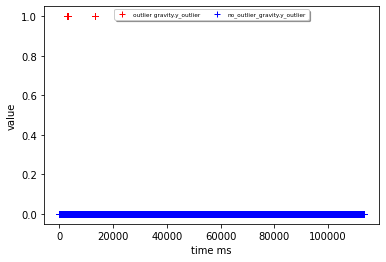

In [5]:
vis = VisualizeDataset()
for col in predictor_columns:
    vis.plot_binary_outliers(dataset, col, col+'_outlier')

# Estimating frequency

In [ ]:
short_trials = [dataset[dataset['trial']==i] for i in range(11,len(dataset.trial.unique())+1)]

In [ ]:
hz_list = []
for j in dataset.index.unique():
    hz_list.append(np.mean(np.array([len(short_trials[i][short_trials[i].index==j])for i in range(len(short_trials))])/45))

In [ ]:
np.mean(hz_list)

In [ ]:
long_trials = [dataset[dataset['trial']==i] for i in range(11)]
hz_list = []
for j in dataset.index.unique():
    hz_list.append(np.mean(np.array([len(long_trials[i][long_trials[i].index==j])for i in range(len(long_trials))])/150))

In [ ]:
np.mean(hz_list)

# Impute missing values

In [23]:
from Chapter3.ImputationMissingValues import ImputationMissingValues

imp_helper = ImputationMissingValues()

for exp in itertools.product(dataset.trial.unique(), dataset.id.unique()):
    trial, person = exp
    print(f'Doing trial {trial} and person {person}')
    for col in predictor_columns:
        imp_helper.impute_interpolate(dataset[dataset.trial.eq(trial)][dataset.id.eq(person)], col)
    

Doing trial 1.0 and person 0.0
Doing trial 1.0 and person 1.0
Doing trial 1.0 and person 2.0
Doing trial 1.0 and person 3.0


/Users/abel/Desktop/ai/AIMASTER/MLQS/ML4QS/env/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Doing trial 1.0 and person 4.0
Doing trial 1.0 and person 5.0
Doing trial 1.0 and person 6.0
Doing trial 1.0 and person 7.0
Doing trial 1.0 and person 8.0
Doing trial 1.0 and person 9.0
Doing trial 1.0 and person 10.0
Doing trial 1.0 and person nan
Doing trial 1.0 and person 11.0
Doing trial 1.0 and person 12.0
Doing trial 1.0 and person 13.0
Doing trial 1.0 and person 14.0
Doing trial 1.0 and person 15.0
Doing trial 1.0 and person 16.0
Doing trial 1.0 and person 17.0
Doing trial 1.0 and person 18.0
Doing trial 1.0 and person 19.0
Doing trial 1.0 and person 20.0
Doing trial 1.0 and person 21.0
Doing trial 1.0 and person 22.0
Doing trial 1.0 and person 23.0
Doing trial nan and person 0.0
Doing trial nan and person 1.0
Doing trial nan and person 2.0
Doing trial nan and person 3.0
Doing trial nan and person 4.0
Doing trial nan and person 5.0
Doing trial nan and person 6.0
Doing trial nan and person 7.0
Doing trial nan and person 8.0
Doing trial nan and person 9.0
Doing trial nan and perso

Doing trial 9.0 and person 14.0
Doing trial 9.0 and person 15.0
Doing trial 9.0 and person 16.0
Doing trial 9.0 and person 17.0
Doing trial 9.0 and person 18.0
Doing trial 9.0 and person 19.0
Doing trial 9.0 and person 20.0
Doing trial 9.0 and person 21.0
Doing trial 9.0 and person 22.0
Doing trial 9.0 and person 23.0
Doing trial 16.0 and person 0.0
Doing trial 16.0 and person 1.0
Doing trial 16.0 and person 2.0
Doing trial 16.0 and person 3.0
Doing trial 16.0 and person 4.0
Doing trial 16.0 and person 5.0
Doing trial 16.0 and person 6.0
Doing trial 16.0 and person 7.0
Doing trial 16.0 and person 8.0
Doing trial 16.0 and person 9.0
Doing trial 16.0 and person 10.0
Doing trial 16.0 and person nan
Doing trial 16.0 and person 11.0
Doing trial 16.0 and person 12.0
Doing trial 16.0 and person 13.0
Doing trial 16.0 and person 14.0
Doing trial 16.0 and person 15.0
Doing trial 16.0 and person 16.0
Doing trial 16.0 and person 17.0
Doing trial 16.0 and person 18.0
Doing trial 16.0 and person 19.

# Feature engineering

#### Frequency domain 

In [6]:
milliseconds_per_instance = (1/50)*1000
print(milliseconds_per_instance)

20.0


### Split for computation
To optimally use our resources the trials per individual will be analysed independently

In [18]:
from Chapter4.FrequencyAbstraction import FourierTransformation


FreqAbs = FourierTransformation()
fs = float(1000)/milliseconds_per_instance

periodic_predictor_cols = list(dataset.columns[:12])


average_t_per_100_rows = []

def do_freq_abstract_for_trial_participant_and_save(trial, participant):
    """
    Does freq abstrac on a single participant for a single trial. After inference results
    are saved to a individual csv for later fusing results.
    """
    
    t_start = time.time()
    
    print(f'Worker doing trial {trial} and participant {participant}')
    
    ds = dataset[dataset.trial.eq(trial)][dataset.id.eq(participant)]
    
    print(f'Working on dataset of shape {ds.shape}')
    
    try:
        expected_run_time = sum(average_t_per_100_rows)/len(average_t_per_100_rows) * (ds.shape[0]/100)
    except:
         expected_run_time = 'UNKNOWN'
    
    print(f'Expected run time: {expected_run_time} s')
    
    my_set = FreqAbs.abstract_frequency(ds, periodic_predictor_cols, int(float(10000)/milliseconds_per_instance), fs)
    
    my_set.to_csv(f'freq_abstraction_trial_{trial}_participant_{participant}.csv')
    t_done = time.time()
    total_time = t_done-t_start
    print(f'Took {total_time} seconds')
    run_time_per_row = total_time/ds.shape[0]
    average_t_per_100_rows.append(100*run_time_per_row)
    
    
    

Cormac

In [ ]:
my_trials = dataset.trial.unique()[:5]
participants = dataset.id.unique()

with Pool(processes=cpu_count()) as p:
    r = p.starmap(do_freq_abstract_for_trial_participant_and_save, itertools.product(my_trials, participants))
    print(r)

print('All done now')

# Abel

In [19]:
my_trials = dataset.trial[5:10]
participants = dataset.id.unique()

with Pool(processes=cpu_count()) as p:
    r = p.starmap(do_freq_abstract_for_trial_participant_and_save, itertools.product(my_trials, participants))

print('All done now')

Worker doing trial 1.0 and participant 0.0


/Users/abel/Desktop/ai/AIMASTER/MLQS/ML4QS/env/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Working on dataset of shape (141, 41)
Expected run time: UNKNOWN s
Took 1.9797260761260986 seconds
Worker doing trial 1.0 and participant 1.0
Working on dataset of shape (172, 41)
Expected run time: 2.414985000664461 s
Took 1.9026076793670654 seconds
All done now


Natasja

In [ ]:
my_trials = dataset.trial[10:15]
participants = dataset.id.unique()

with Pool(processes=cpu_count()) as p:
    r = p.starmap(do_freq_abstract_for_trial_participant_and_save, itertools.product(my_trials, participants))
    print(r)

print('All done now')

### Merge back together

In [ ]:
datasets = []
for csv_file_freq_abs in glob.glob('freq_abstraction_trial_*_participant_*.csv'):
    datasets.append(pd.read_csv(csv_file_freq_abs))

    
    
dataset = pd.concat(datasets)


#### Time Domain

# Feature Selection

We perform selection on 20% of the dataset.

#### Initial Train split for feature selection

In [ ]:
train = dataset.sample(frac=0.2,random_state=200)
train_x = train.drop(columns=['act'])
train_y = train['act']

#### Forward Selection

In [ ]:
 selected_features, ordered_features, ordered_scores = FeatureSelectionClassification().forward_selection(max_features, train_X, train_y)

In [ ]:
dataset = dataset[selected_features]

In [ ]:
#dataset.to_csv(Path('selected_set.csv'))

# Experiments - whole data set

In [ ]:
# dataset = pd.read_csv(Path('selected_set.csv'))

Begin with random forest across all targets. Whatever target seems to be most predictable we will apply other algorithms to.

Predict activity label - whole dataset.

In [ ]:
#Take random samples for this experiment
train=dataset.sample(frac=0.3) #random state is a seed value
test=dataset.drop(train.index)
test= test.sample(frac=0.3)

train_y = train['act']
train_X = train.drop(columns=['act'])
test_y = test['act']
test_X = test.drop(columns=['act'])

pred_training_y, pred_test_y, frame_prob_training_y, frame_prob_test_y = ClassificationAlgorithms().random_forest(train_X, train_y, test_X)



Predict age based on sensor values - whole dataset

In [ ]:
train=dataset.sample(frac=0.3)
test=dataset.drop(train.index)
test= test.sample(frac=0.3)

train_y = train['age']
train_X = train.drop(columns=['age'])
test_y = test['age']
test_X = test.drop(columns=['age'])

return pred_training_y, pred_test_y = RegressionAlgorithms().random_forest(self, train_X, train_y, test_X)

Predict gender - whole dataset

In [ ]:
train=dataset.sample(frac=0.3)
test=dataset.drop(train.index)
test= test.sample(frac=0.3)

train_y = train['gender']
train_X = train.drop(columns=['gender'])
test_y = test['gender']
test_X = test.drop(columns=['gender'])

pred_training_y, pred_test_y, frame_prob_training_y, frame_prob_test_y = ClassificationAlgorithms().random_forest(train_X, train_y, test_X)

Predict weight - whole dataset

In [ ]:
train=dataset.sample(frac=0.3)
test=dataset.drop(train.index)
test= test.sample(frac=0.3)

train_y = train['weight']
train_X = train.drop(columns=['weight'])
test_y = test['weight']
test_X = test.drop(columns=['weight'])


return pred_training_y, pred_test_y = RegressionAlgorithms().random_forest(self, train_X, train_y, test_X)

# Experiments - By Trial

In [ ]:
trials = [dataset[dataset['trial']==i] for i in dataset['trial'].unique()]

In [ ]:
class_alg = ClassificationAlgorithms()

def generate_sets(data_set):
    train=dataset.sample(frac=0.3) #random state is a seed value
    test=dataset.drop(train.index)
    test= test.sample(frac=0.3)

    train_y = train['act']
    train_X = train.drop(columns=['act'])
    test_y = test['act']
    test_X = test.drop(columns=['act'])
    
    return train_y, train_X, test_y, test_X



def train_classification(train_y, train_X, test_y, test_X, class_alg):
    pred_training_y, pred_test_y, frame_prob_training_y, frame_prob_test_y = class_alg.random_forest(train_X, train_y, test_X)
    return pred_training_y, pred_test_y, frame_prob_training_y, frame_prob_test_y

def evaluate_classifcation(y_true, y_pred):
    evaluation = ClassificationEvaluation()
    return evaluation.accuracy(y_true, y_pred), evaluation.precision(y_true, y_pred), evaluation.recall(y_true, y_pred), evaluation.f1(y_true, y_pred)



Random forest for the labels by trial

In [ ]:
acc = []
prec = []
recall = []
f1 = []

for subset in trials:
    train_y, train_X, test_y, test_X = generate_sets(subset)
    pred_training_y, pred_test_y, frame_prob_training_y, frame_prob_test_y = train_classification(train_y, train_X, test_y, test_X, class_alg)
    accuracy, precision, recall, f1_ = evaluate_classifcation(test_y, pred_test_y)
    acc.append(accuracy)
    prec.append(precision)
    recall.append(recall)
    f1.append(f1_)